<a href="https://colab.research.google.com/github/ddivebkhan/Medical-Cost-Analysis/blob/main/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context

Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R.


# Content:

## Columns

    age: age of primary beneficiary

    sex: insurance contractor gender, female, male

    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children: Number of children covered by health insurance / Number of dependents

    smoker: Smoking

    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges: Individual medical costs billed by health insurance

# Acknowledgements

The dataset is available on GitHub here : https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

# Inspiration

Can you accurately predict insurance costs?

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


In [ ]:
#kagglehub dataset_download stores to current working directory
file_path = path + '/insurance.csv'

# Read the CSV into a pandas DataFrame.
df = pd.read_csv(file_path)

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

# The `df.info()` method provides a quick overview of a pandas DataFrame’s structure, displaying data types, null values,
# and memory usage for each column, which is crucial for understanding the dataset before analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


##Relationship Between Age and Medical Expenses:

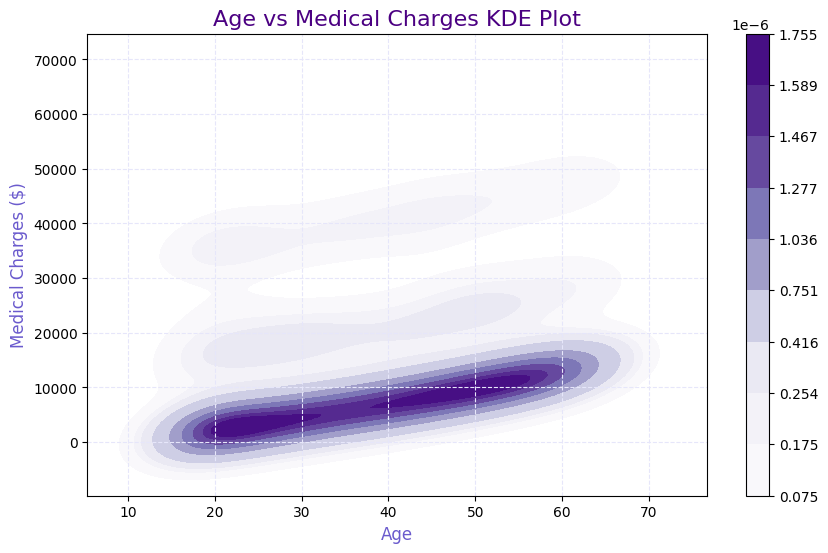

In [ ]:
"""This code snippet is creating a visualization to explore the relationship between a person's age and their medical charges
using a Kernel Density Estimation (KDE) """

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="age",
    y="charges",
    cmap="Purples",
    shade=True,
    cbar=True
)

plt.title("Age vs Medical Charges KDE Plot", fontsize=16, color='indigo')
plt.xlabel("Age", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, color='lavender', linestyle='--')
plt.show()

#Gender and Average Medical Expenses#

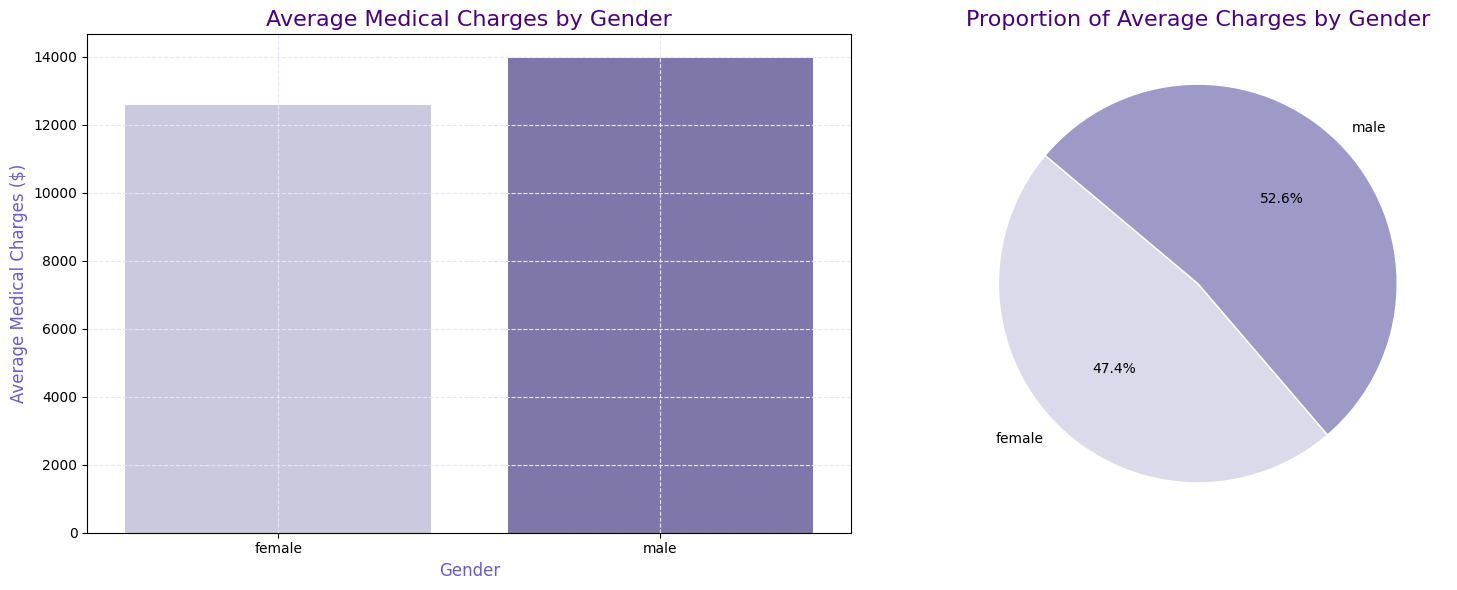

In [ ]:
average_charges_by_sex = df.groupby('sex')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", 3)
# Sütun grafiği
sns.barplot(ax=axes[0], data=average_charges_by_sex, x="sex", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Gender", fontsize=16, color='indigo')
axes[0].set_xlabel("Gender", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')


axes[1].pie(
    average_charges_by_sex['charges'],
    labels=average_charges_by_sex['sex'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Gender", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

#Comparison of Smokers and Non-Smokers:#

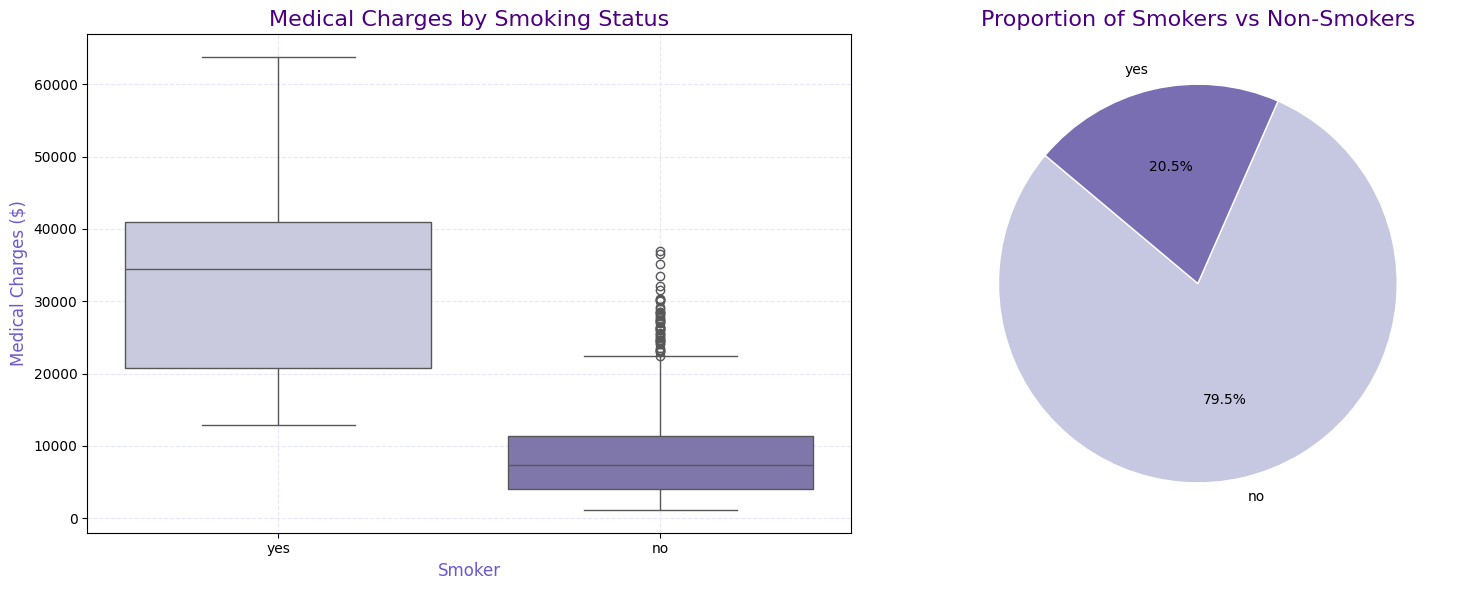

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", 2)

sns.boxplot(ax=axes[0], data=df, x="smoker", y="charges", palette="Purples")
axes[0].set_title("Medical Charges by Smoking Status", fontsize=16, color='indigo')
axes[0].set_xlabel("Smoker", fontsize=12, color='slateblue')
axes[0].set_ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

smoker_counts = df['smoker'].value_counts()
axes[1].pie(
    smoker_counts,
    labels=smoker_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Smokers vs Non-Smokers", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()


#Cost Analysis by Region:#

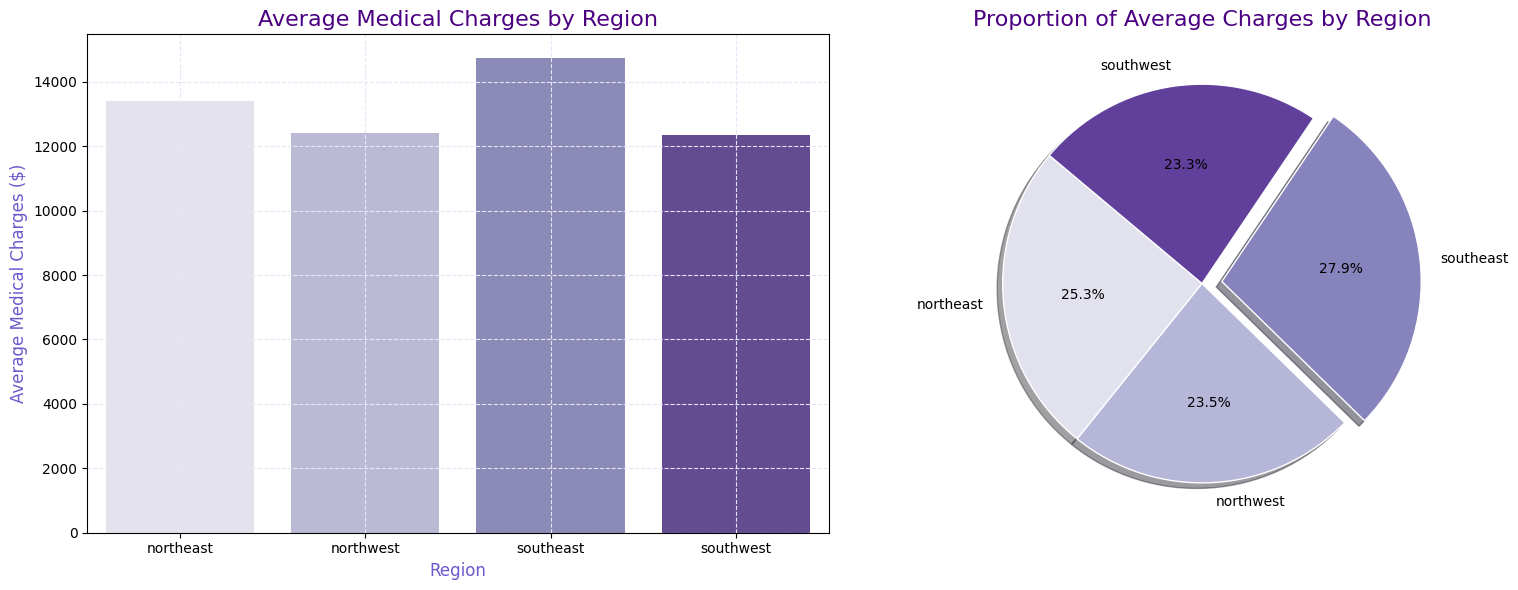

In [ ]:
average_charges_by_region = df.groupby('region')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", len(average_charges_by_region))


sns.barplot(ax=axes[0], data=average_charges_by_region, x="region", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Region", fontsize=16, color='indigo')
axes[0].set_xlabel("Region", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

charges = average_charges_by_region['charges']
regions = average_charges_by_region['region']
explode = [0.1 if i == charges.idxmax() else 0 for i in range(len(charges))]
axes[1].pie(
    charges,
    labels=regions,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Region", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

#Relationship Between Number of Children and Expenses:#

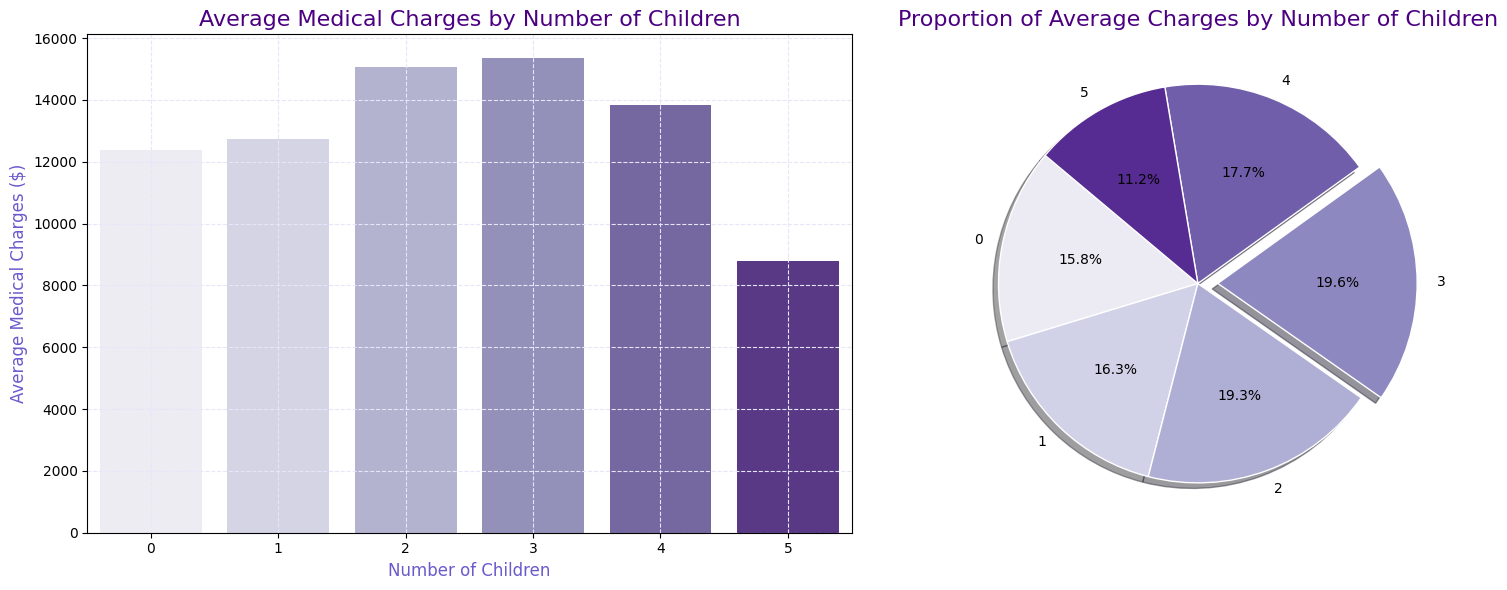

In [ ]:
average_charges_by_children = df.groupby('children')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", len(average_charges_by_children))


sns.barplot(ax=axes[0], data=average_charges_by_children, x="children", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Number of Children", fontsize=16, color='indigo')
axes[0].set_xlabel("Number of Children", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

charges = average_charges_by_children['charges']
children = average_charges_by_children['children']
explode = [0.1 if i == charges.idxmax() else 0 for i in range(len(charges))]
axes[1].pie(
    charges,
    labels=children,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Number of Children", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

#Combined Effect of Smoking, BMI and Expenses:#

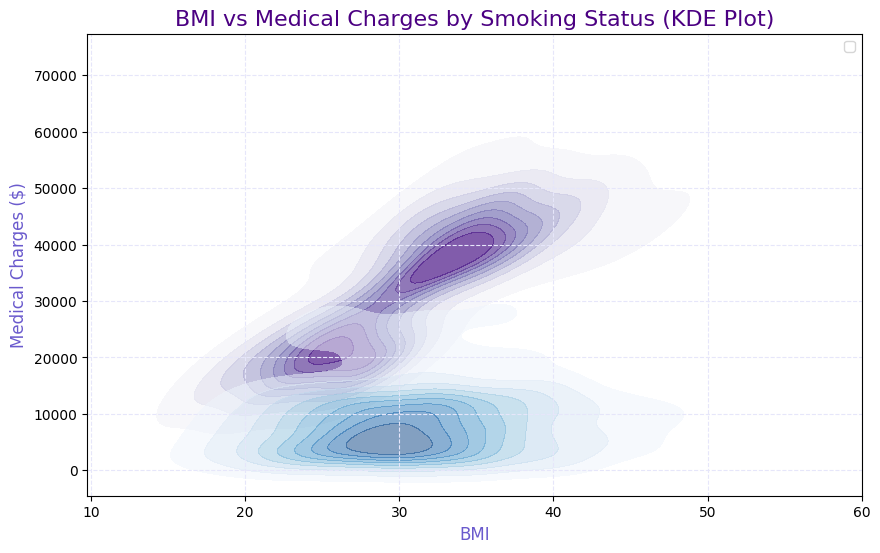

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=df[df['smoker'] == 'yes'],
    x="bmi",
    y="charges",
    cmap="Purples",
    shade=True,
    alpha=0.7,
    label="Smoker",
    linewidth=2
)

sns.kdeplot(
    data=df[df['smoker'] == 'no'],
    x="bmi",
    y="charges",
    cmap="Blues",
    shade=True,
    alpha=0.5,
    label="Non-Smoker",
    linewidth=2
)

plt.title("BMI vs Medical Charges by Smoking Status (KDE Plot)", fontsize=16, color='indigo')
plt.xlabel("BMI", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, linestyle='--', color='lavender')
plt.legend()
plt.show()



In [ ]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

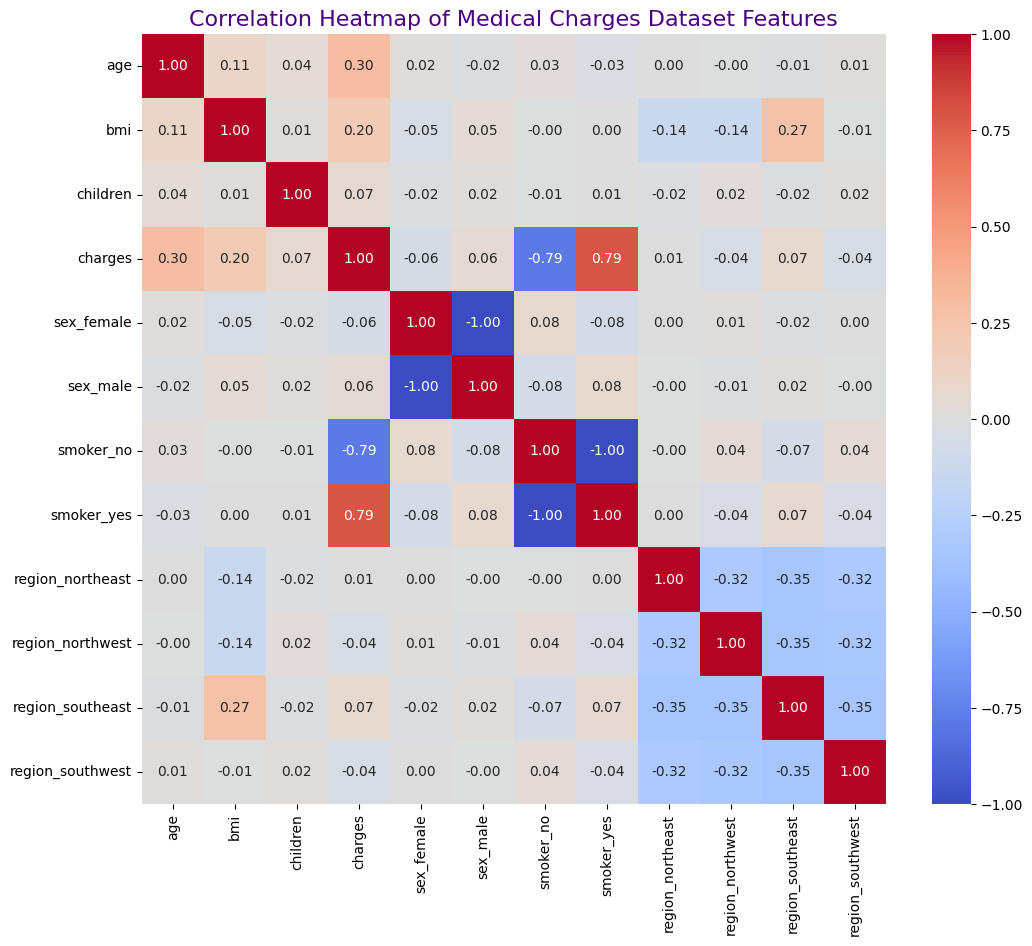

In [ ]:
# prompt: Plot correlation heatmap using seaborn

plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Medical Charges Dataset Features', fontsize=16, color='indigo')
plt.show()

In [ ]:
# prompt: create regression model using features and evaluated the performance of the model with MSE and RMSE.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

# Assuming 'df' is your DataFrame from the previous code
# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Define features (X) and target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 33596915.85136148
Root Mean Squared Error (RMSE): 5796.284659276275
